### PLEASE, SCROLL DOWN TO SEE THE SUMMARY AND RECOMMENDATION ENGINE 

In [476]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [477]:
df1=pd.read_csv('data.csv',index_col = False)
df2=pd.read_csv('zip_codes.csv')

In [478]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 6 columns):
Course          65535 non-null object
Job             65535 non-null object
HomeZip         65488 non-null float64
WorkZip         65535 non-null int64
YearsWorking    65535 non-null int64
Id              65535 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.0+ MB


In [479]:
df_full=df1.dropna()

df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65488 entries, 0 to 65534
Data columns (total 6 columns):
Course          65488 non-null object
Job             65488 non-null object
HomeZip         65488 non-null float64
WorkZip         65488 non-null int64
YearsWorking    65488 non-null int64
Id              65488 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 3.5+ MB


In [480]:
df_full['HomeZip']=df_full['HomeZip'].apply(lambda x: int(x))

In [481]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65488 entries, 0 to 65534
Data columns (total 6 columns):
Course          65488 non-null object
Job             65488 non-null object
HomeZip         65488 non-null int64
WorkZip         65488 non-null int64
YearsWorking    65488 non-null int64
Id              65488 non-null int64
dtypes: int64(4), object(2)
memory usage: 3.5+ MB


In [482]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42741 entries, 0 to 42740
Data columns (total 6 columns):
zip_code     42741 non-null int64
latitude     42049 non-null float64
longitude    42049 non-null float64
city         42741 non-null object
state        42741 non-null object
county       42199 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [483]:
df_home_zip=df2.copy()
df_work_zip=df2.copy()

In [484]:
df_home=df_home_zip.rename(index=str, columns={"zip_code": "HomeZip", "city": "City_home",\
                                      "state":"State_home", "county":"County_home",\
                                      "latitude": "Latitude_home","longitude": "Longitude_home"});

In [485]:
df_work=df_work_zip.rename(index=str, columns={"zip_code": "WorkZip", "city": "City_work",\
                                      "state":"State_work", "county":"County_work",\
                                      "latitude": "Latitude_work","longitude": "Longitude_work"});

In [486]:
data=pd.merge(df1, df_work, on=['WorkZip'],how='inner')
# data=pd.merge(df_merge_home, df_work, on=['WorkZip'],how='inner')

In [487]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65267 entries, 0 to 65266
Data columns (total 11 columns):
Course            65267 non-null object
Job               65267 non-null object
HomeZip           65220 non-null float64
WorkZip           65267 non-null int64
YearsWorking      65267 non-null int64
Id                65267 non-null int64
Latitude_work     65233 non-null float64
Longitude_work    65233 non-null float64
City_work         65267 non-null object
State_work        65267 non-null object
County_work       65267 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 6.0+ MB


In [488]:
# print ("Unique Home States:",data['State_home'].nunique())
# print ("Unique Home Cities:",data['City_home'].nunique())
# print ("Unique Home Counties:",data['County_home'].nunique())
print ("Unique Work States:",data['State_work'].nunique())
print ("Unique Work Cities:",data['City_work'].nunique())
print ("Unique Work Counties:",data['County_work'].nunique())

Unique Work States: 10
Unique Work Cities: 283
Unique Work Counties: 48


In [489]:
print ("Unique Courses:",df1['Course'].nunique())
print ("Unique Jobs:", df1['Job'].nunique())
print ("Unique HomeZips:", df1['HomeZip'].nunique())
print ("Unique Years Working:",df1['YearsWorking'].nunique())
print ("Unique WorkZip:", df1['WorkZip'].nunique())
print ("Unique Ids:",df1['Id'].nunique())

Unique Courses: 257
Unique Jobs: 105
Unique HomeZips: 1156
Unique Years Working: 44
Unique WorkZip: 597
Unique Ids: 15069


In [490]:
df_course=df1.groupby(['Course'])['Id'].nunique().to_frame('Count').sort_values('Count',ascending=False)[:20]
df_course.reset_index(inplace=True)
# df_course

### PART 1: EXPLORATORY DATA ANALYSIS

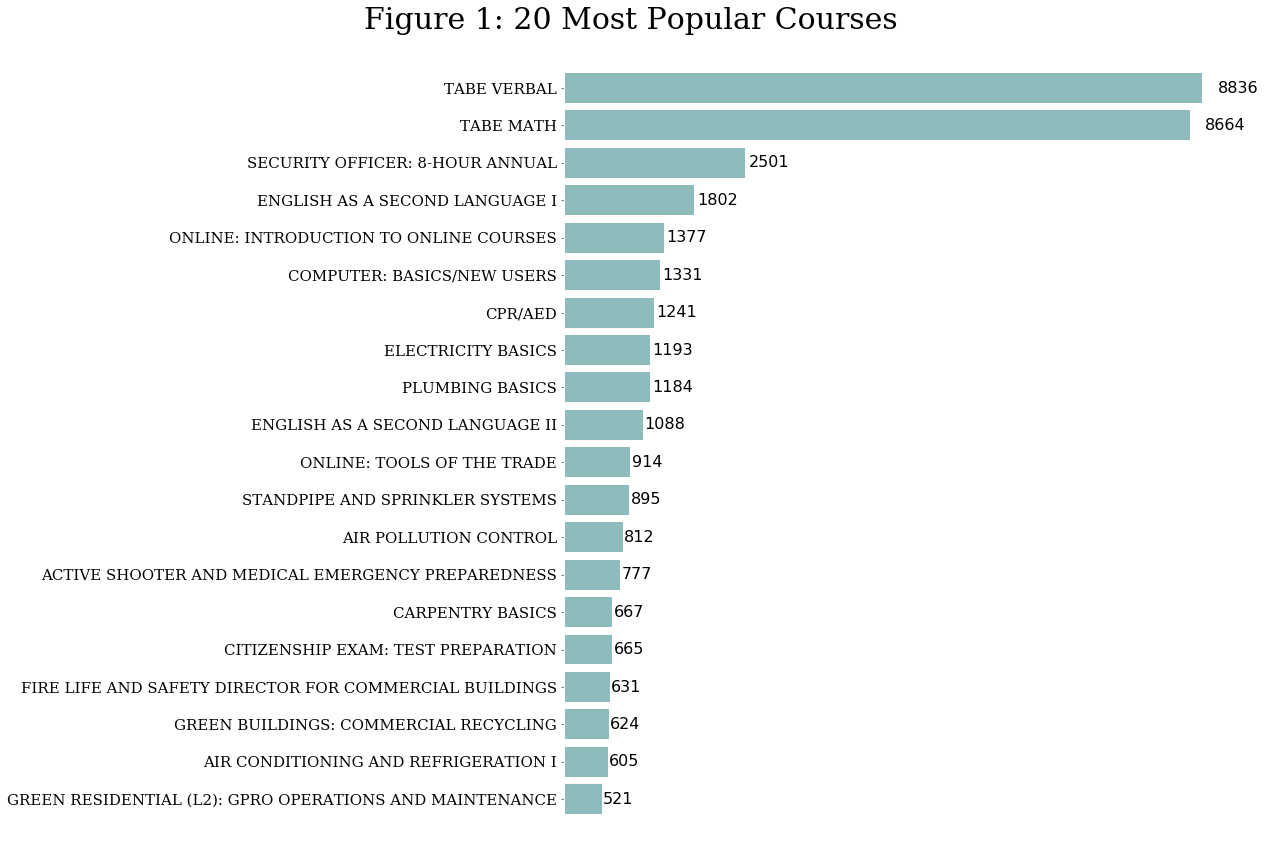

In [491]:
# plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
fig, axes=plt.subplots(figsize=(12,15))


pos = list(range(len(df_course['Course'])))[::-1]

axes.barh(pos, df_course['Count'],alpha=.7,align="center",color='cadetblue')
axes.set_title('Figure 1: 20 Most Popular Courses', y=1.001,x=.10,fontsize=30,family="serif")
for rect in axes.patches:
    width = rect.get_width()
    axes.text(1.025*rect.get_width(), rect.get_y()+.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center',size=16)
axes.grid(b=None)
# axes.yaxis.grid(False)
axes.set_facecolor('white')

axes.xaxis.set_ticks_position('none')
axes.set_yticks(pos)
axes.set_yticklabels(df_course['Course'], size =15,family='serif', color='black')
# axes.set_xlabel('Count',family='serif',size=26)
axes.get_xaxis().set_ticks([])
plt.show()

In [494]:
df_course=df1.groupby(['Course'])['Id'].nunique().to_frame('Count').sort_values('Count')[:20]
df_course.reset_index(inplace=True)
# df_course

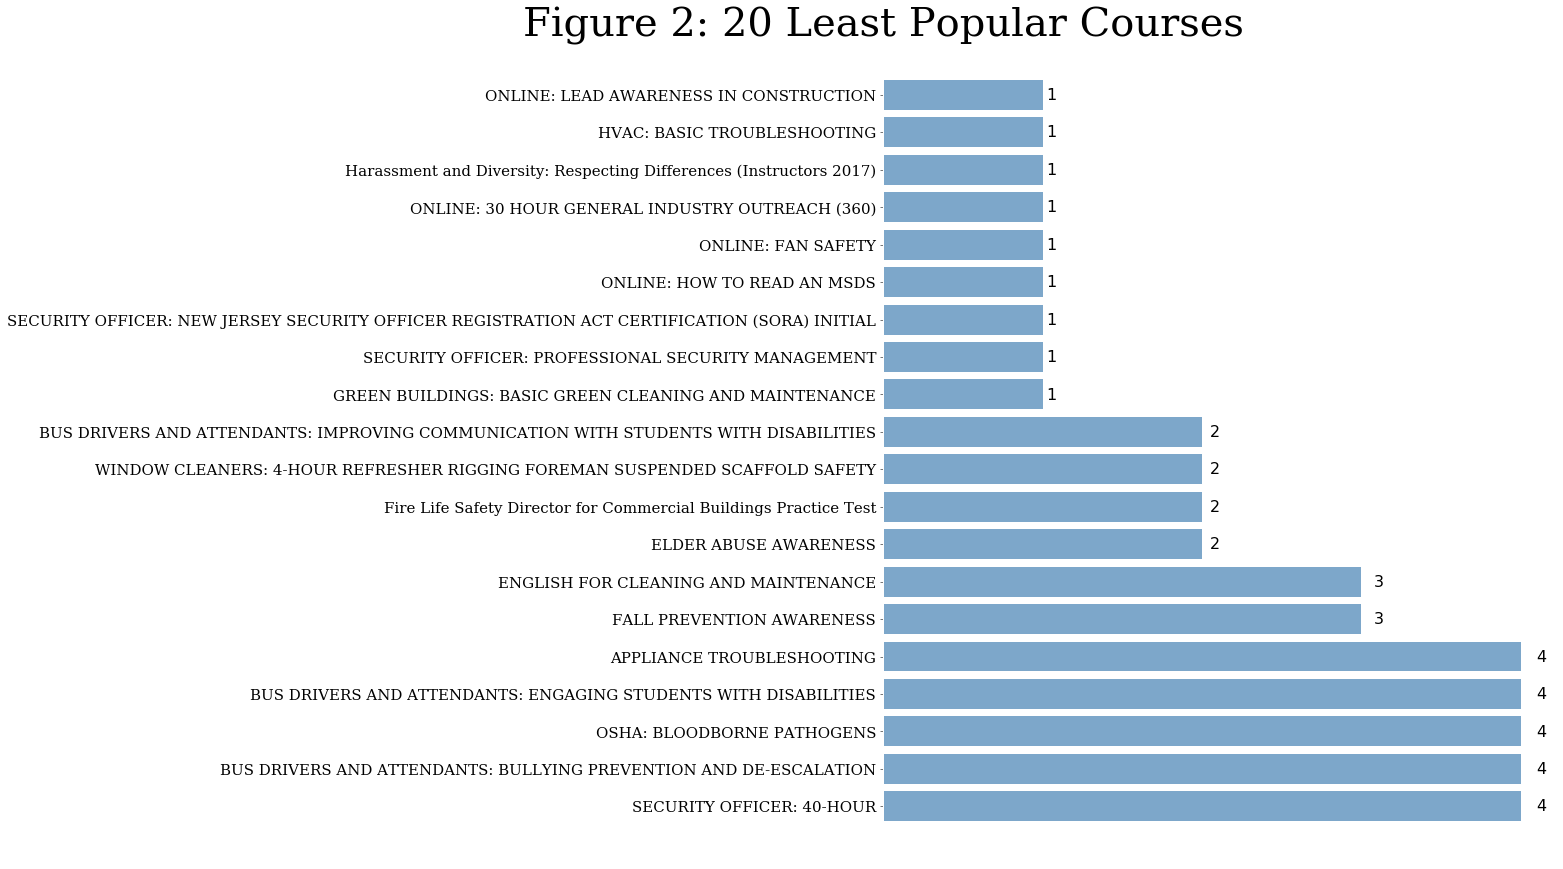

In [495]:

plt.style.use('ggplot')
fig, axes=plt.subplots(figsize=(12,15))


pos = list(range(len(df_course['Course'])))[::-1]

axes.barh(pos, df_course['Count'],alpha=.7,align="center",color='steelblue')
axes.set_title('Figure 2: 20 Least Popular Courses', y=1.001,x=.0005,fontsize=40,family="serif")
for rect in axes.patches:
    width = rect.get_width()
    axes.text(1.025*rect.get_width(), rect.get_y()+.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center',size=16)
axes.grid(b=None)
# axes.yaxis.grid(False)
axes.set_facecolor('white')

axes.xaxis.set_ticks_position('none')
axes.set_yticks(pos)
axes.set_yticklabels(df_course['Course'], size =15,family='serif', color='black')
# axes.set_xlabel('Count',family='serif',size=26)
axes.get_xaxis().set_ticks([])
plt.show()

In [496]:
df_job=data.groupby(['Job'])['Id'].nunique().to_frame('Count').sort_values('Count',ascending=False)[:30]
df_job.reset_index(inplace=True)


In [497]:
df1['Job1']=df1['Job'].apply(lambda x: ''.join(x.split(' ')))

In [498]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 7 columns):
Course          65535 non-null object
Job             65535 non-null object
HomeZip         65488 non-null float64
WorkZip         65535 non-null int64
YearsWorking    65535 non-null int64
Id              65535 non-null int64
Job1            65535 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 3.5+ MB


In [502]:
catcloud = WordCloud(collocations=False,\
                          stopwords=STOPWORDS,
                          background_color='lightcoral',
                          width=1200,
                          height=800,
                     min_font_size=1,
                         ).generate(" ".join(df1['Job1'].values))

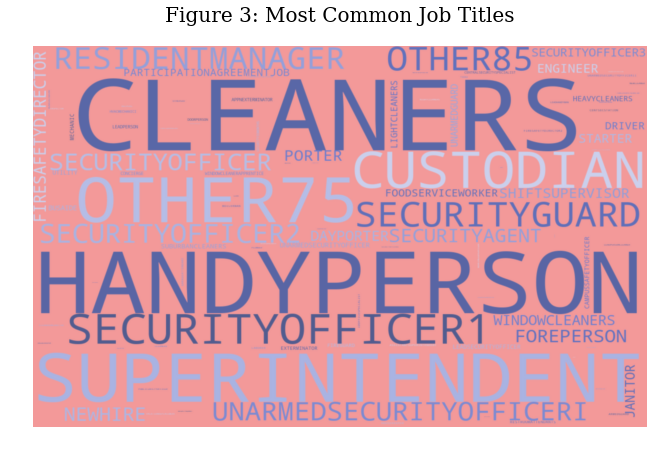

In [503]:
import random

def color_func(word, font_size, position, orientation, random_state=4,
                    **kwargs):
    return "hsl(230, 50%%, %d%%)" % random.randint(30, 85)
plt.subplots( figsize=(11, 7))

plt.imshow(catcloud.recolor(color_func=color_func, random_state=4),
           interpolation="gaussian",alpha=.8,aspect='auto')

plt.title('Figure 3: Most Common Job Titles', y=1.05,fontsize=20,family="serif")
plt.axis('off')
plt.show()

In [370]:
df_jc=df1.groupby(['Job'])['Course'].nunique().to_frame('Count').sort_values('Count',ascending=False)[:30]
df_jc.reset_index(inplace=True)


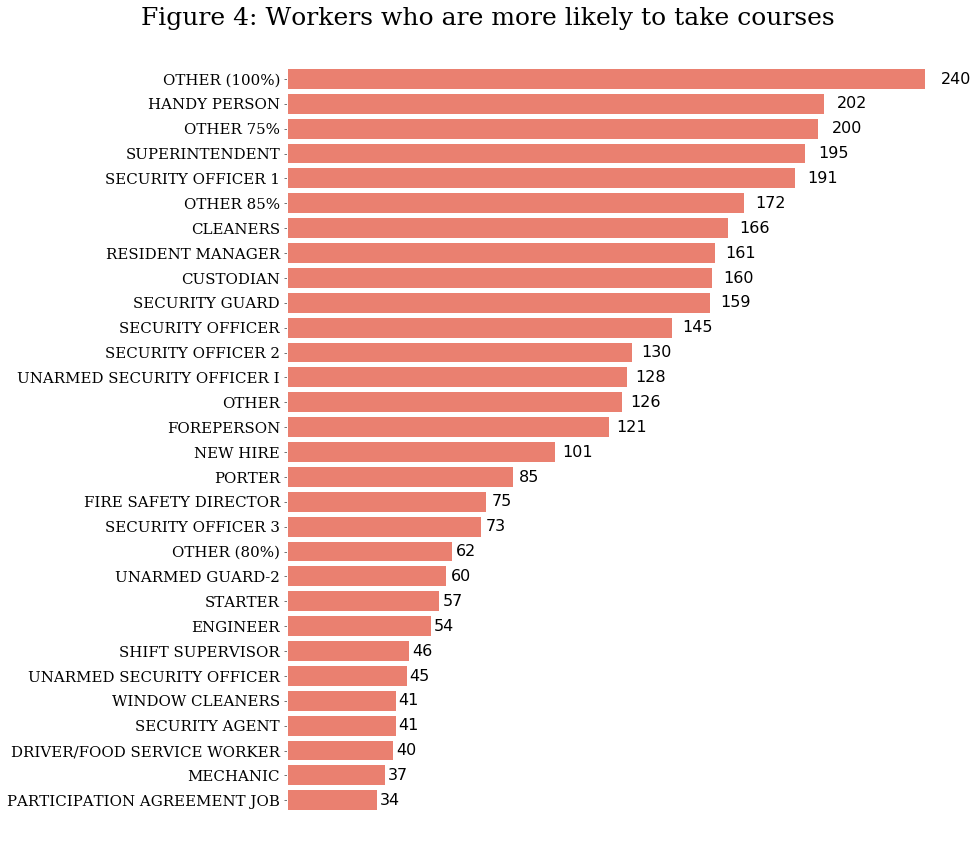

In [504]:
# plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
fig, axes=plt.subplots(figsize=(12,15))


pos = list(range(len(df_jc['Job'])))[::-1]

axes.barh(pos, df_jc['Count'],alpha=.7,align="center")
axes.set_title('Figure 4: Workers who are more likely to take courses', y=1.001,x=.30,fontsize=25,family="serif")
for rect in axes.patches:
    width = rect.get_width()
    axes.text(1.025*rect.get_width(), rect.get_y()+.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center',size=16)
axes.grid(b=None)
# axes.yaxis.grid(False)
axes.set_facecolor('white')

axes.xaxis.set_ticks_position('none')
axes.set_yticks(pos)
axes.set_yticklabels(df_jc['Job'], size =15,family='serif', color='black')
# axes.set_xlabel('Count',family='serif',size=26)
axes.get_xaxis().set_ticks([])
plt.show()

In [525]:
df_h=df1.groupby('Id')['YearsWorking'].mean().to_frame().sort_values('YearsWorking');
df_h.reset_index(inplace=True)
df_h

,Id,YearsWorking
0,135090,0.0
1,72457,0.0
2,114787,0.0
3,144722,0.0
4,54761,0.0
5,51868,0.0
6,72427,0.0
7,144751,0.0
8,176813,0.0
9,72412,0.0


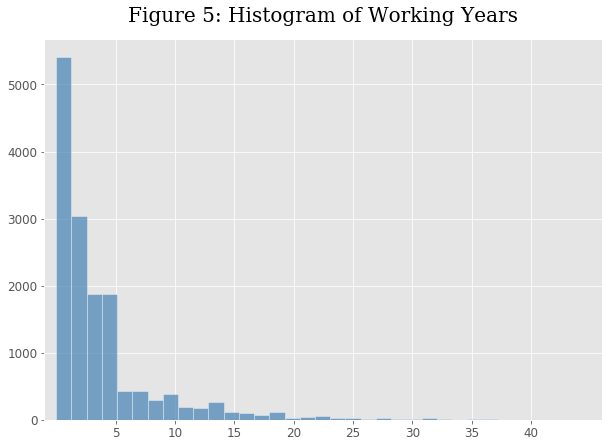

In [522]:

plt.style.use('ggplot')
dat=df_h['YearsWorking']

plt.figure(figsize=(10,7))
bins = np.linspace(0, 50, 40);
plt.title("Figure 5: Histogram of Working Years",fontsize=20,y=1.03,family='serif')
plt.hist(dat,bins, label='Male', alpha=.7, color='steelblue',edgecolor = 'w')

plt.xlim([-1,46])
plt.xticks(range(5,45, 5),fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [341]:
df_c=df1.groupby('Course')['YearsWorking'].mean().to_frame().sort_values('YearsWorking',ascending=False)[:20];
df_c.reset_index(inplace=True)


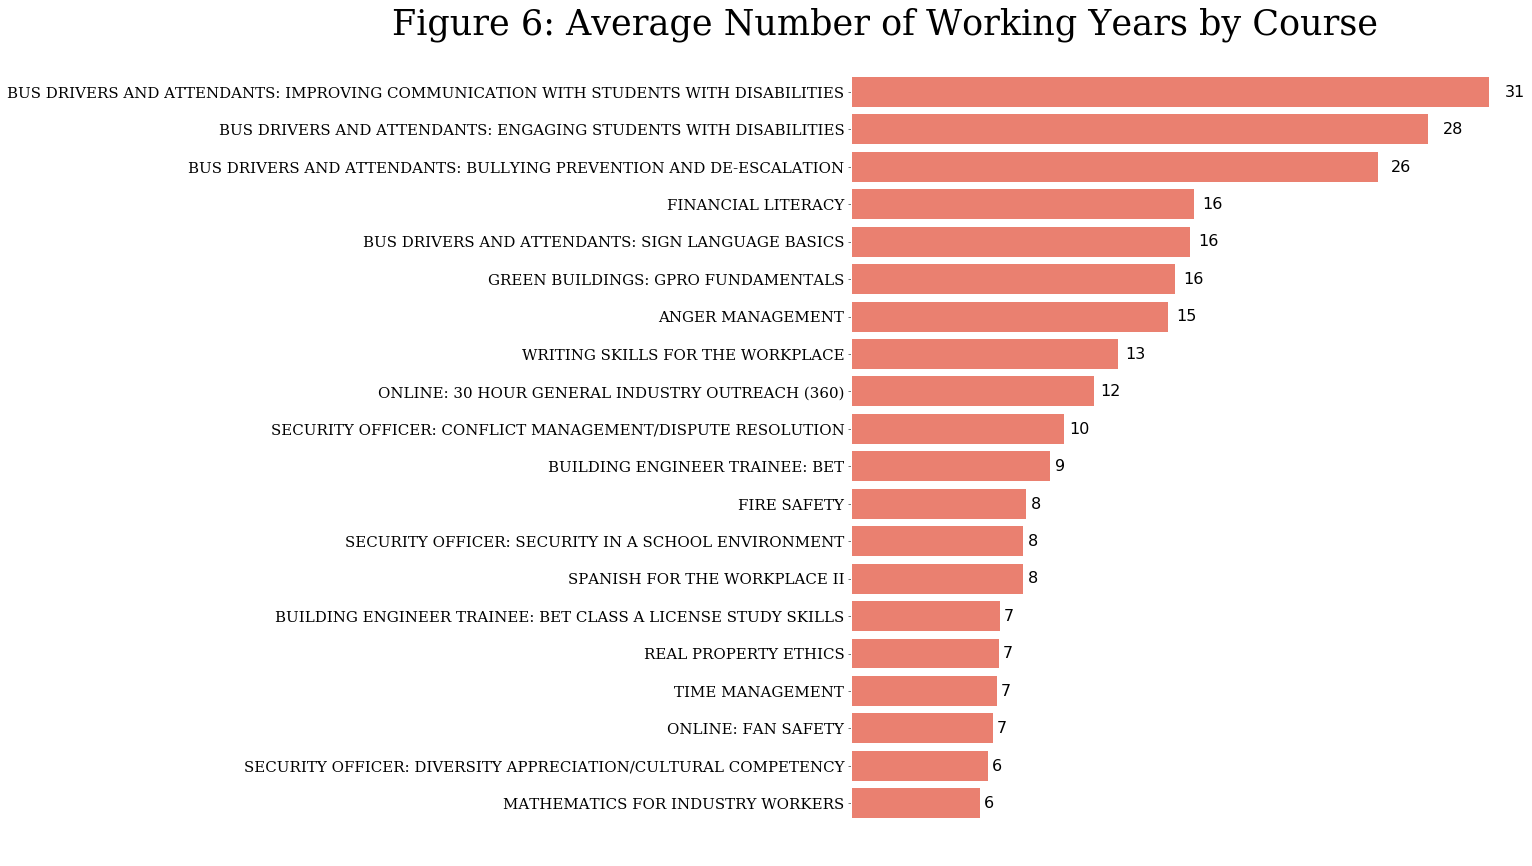

In [523]:
plt.style.use('ggplot')
fig, axes=plt.subplots(figsize=(12,15))


pos = list(range(len(df_c['Course'])))[::-1]

axes.barh(pos, df_c['YearsWorking'],alpha=.7,align="center")
axes.set_title('Figure 6: Average Number of Working Years by Course',x=.05,fontsize=35,family="serif")
for rect in axes.patches:
    width = rect.get_width()
    axes.text(1.025*rect.get_width(), rect.get_y()+.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center',size=16)
axes.grid(b=None)
# axes.yaxis.grid(False)
axes.set_facecolor('white')

axes.xaxis.set_ticks_position('none')
axes.set_yticks(pos)
axes.set_yticklabels(df_c['Course'], size =15,family='serif', color='black')
# axes.set_xlabel('Count',family='serif',size=26)
axes.get_xaxis().set_ticks([])
plt.show()

In [527]:
df_state_c=data.groupby(['State_work'])['Course'].nunique().to_frame('Count').sort_values('Count',ascending=False)[:30]
df_state_c.reset_index(inplace=True)


df_state_j=data.groupby(['State_work'])['Job'].nunique().to_frame('Count').sort_values('Count',ascending=False)[:30]
df_state_j.reset_index(inplace=True)


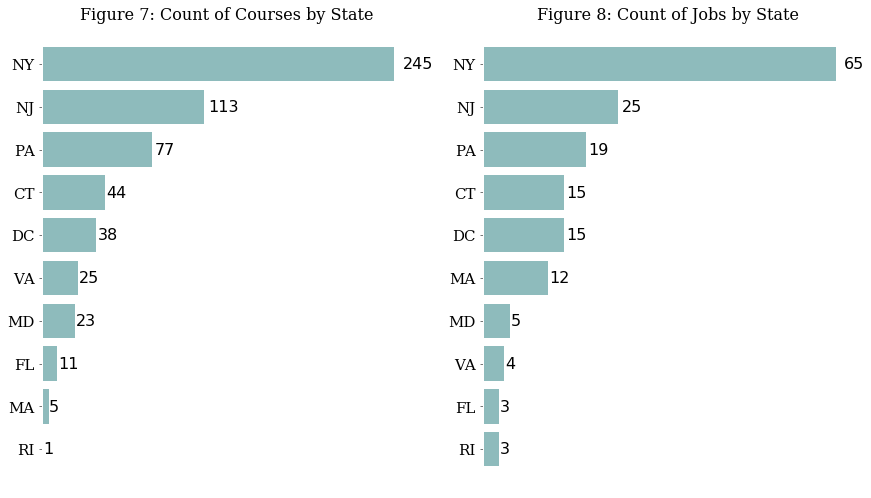

In [528]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize=(12,7))
plt.tight_layout(w_pad=4)

pos = list(range(len(df_state_c['State_work'])))[::-1]

axes[0].barh(pos, df_state_c['Count'],alpha=.7,align="center",color='cadetblue')
axes[0].set_title('Figure 7: Count of Courses by State', y=1.001,x=.50,fontsize=16,family="serif")
for rect in axes[0].patches:
    width = rect.get_width()
    axes[0].text(1.025*rect.get_width(), rect.get_y()+.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center',size=16)
axes[0].grid(b=None)
# axes.yaxis.grid(False)
axes[0].set_facecolor('white')

axes[0].xaxis.set_ticks_position('none')
axes[0].set_yticks(pos)
axes[0].set_yticklabels(df_state_c['State_work'], size =15,family='serif', color='black')
# axes.set_xlabel('Count',family='serif',size=26)
axes[0].get_xaxis().set_ticks([])



pos = list(range(len(df_state_j['State_work'])))[::-1]

axes[1].barh(pos, df_state_j['Count'],alpha=.7,align="center",color='cadetblue')
axes[1].set_title('Figure 8: Count of Jobs by State', y=1.001,x=.50,fontsize=16,family="serif")
for rect in axes[1].patches:
    width = rect.get_width()
    axes[1].text(1.025*rect.get_width(), rect.get_y()+.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center',size=16)
axes[1].grid(b=None)
# axes.yaxis.grid(False)
axes[1].set_facecolor('white')

axes[1].xaxis.set_ticks_position('none')
axes[1].set_yticks(pos)
axes[1].set_yticklabels(df_state_j['State_work'], size =15,family='serif', color='black')
# axes.set_xlabel('Count',family='serif',size=26)
axes[1].get_xaxis().set_ticks([])


plt.show()

In [529]:
df_state_c=data.groupby(['City_work'])['Course'].nunique().to_frame('Count').sort_values('Count',ascending=False)[:30]
df_state_c.reset_index(inplace=True)


df_state_j=data.groupby(['City_work'])['Job'].nunique().to_frame('Count').sort_values('Count',ascending=False)[:30]
df_state_j.reset_index(inplace=True)


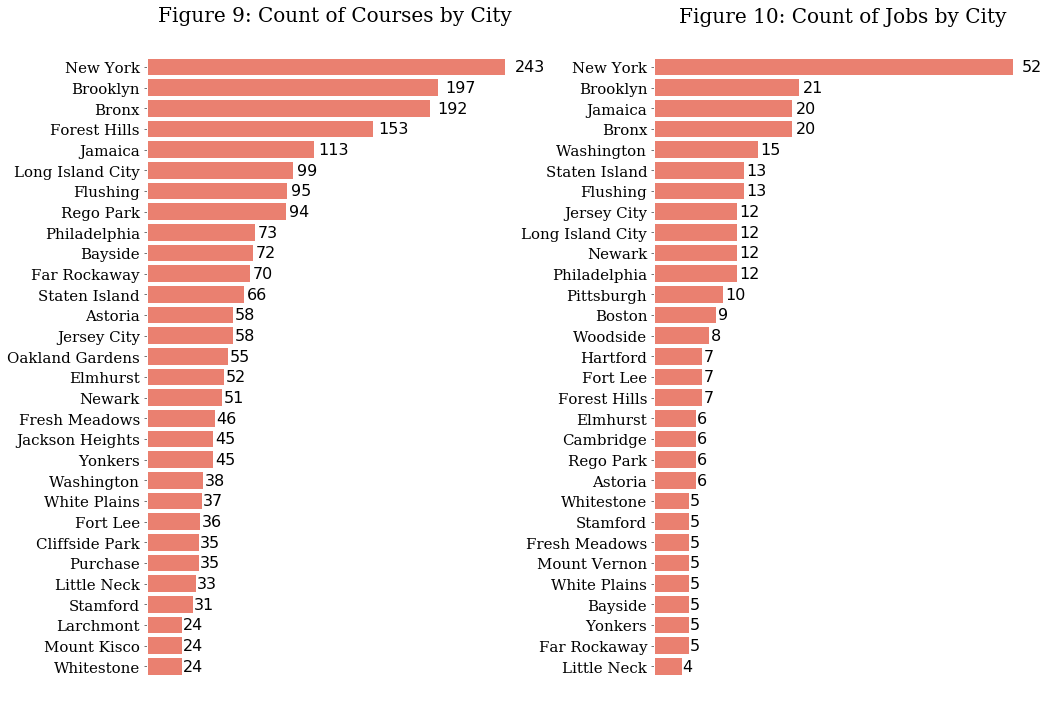

In [533]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize=(13,10))
plt.tight_layout(w_pad=10)

pos = list(range(len(df_state_c['City_work'])))[::-1]

axes[0].barh(pos, df_state_c['Count'],alpha=.7,align="center")
axes[0].set_title('Figure 9: Count of Courses by City', y=1.001,x=.50,fontsize=20,family="serif")
for rect in axes[0].patches:
    width = rect.get_width()
    axes[0].text(1.025*rect.get_width(), rect.get_y()+.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center',size=16)
axes[0].grid(b=None)
# axes.yaxis.grid(False)
axes[0].set_facecolor('white')

axes[0].xaxis.set_ticks_position('none')
axes[0].set_yticks(pos)
axes[0].set_yticklabels(df_state_c['City_work'], size =15,family='serif', color='black')
# axes.set_xlabel('Count',family='serif',size=26)
axes[0].get_xaxis().set_ticks([])



pos = list(range(len(df_state_j['City_work'])))[::-1]

axes[1].barh(pos, df_state_j['Count'],alpha=.7,align="center")
axes[1].set_title('Figure 10: Count of Jobs by City', x=.50,fontsize=20,family="serif")
for rect in axes[1].patches:
    width = rect.get_width()
    axes[1].text(1.025*rect.get_width(), rect.get_y()+.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center',size=16)
axes[1].grid(b=None)
# axes.yaxis.grid(False)
axes[1].set_facecolor('white')

axes[1].xaxis.set_ticks_position('none')
axes[1].set_yticks(pos)
axes[1].set_yticklabels(df_state_j['City_work'], size =15,family='serif', color='black')
# axes.set_xlabel('Count',family='serif',size=26)
axes[1].get_xaxis().set_ticks([])


plt.show()

In [534]:
df_state_c=data.groupby(['County_work'])['Course'].nunique().to_frame('Count').sort_values('Count',ascending=False)[:30]
df_state_c.reset_index(inplace=True)


df_state_j=data.groupby(['County_work'])['Job'].nunique().to_frame('Count').sort_values('Count',ascending=False)[:30]
df_state_j.reset_index(inplace=True)

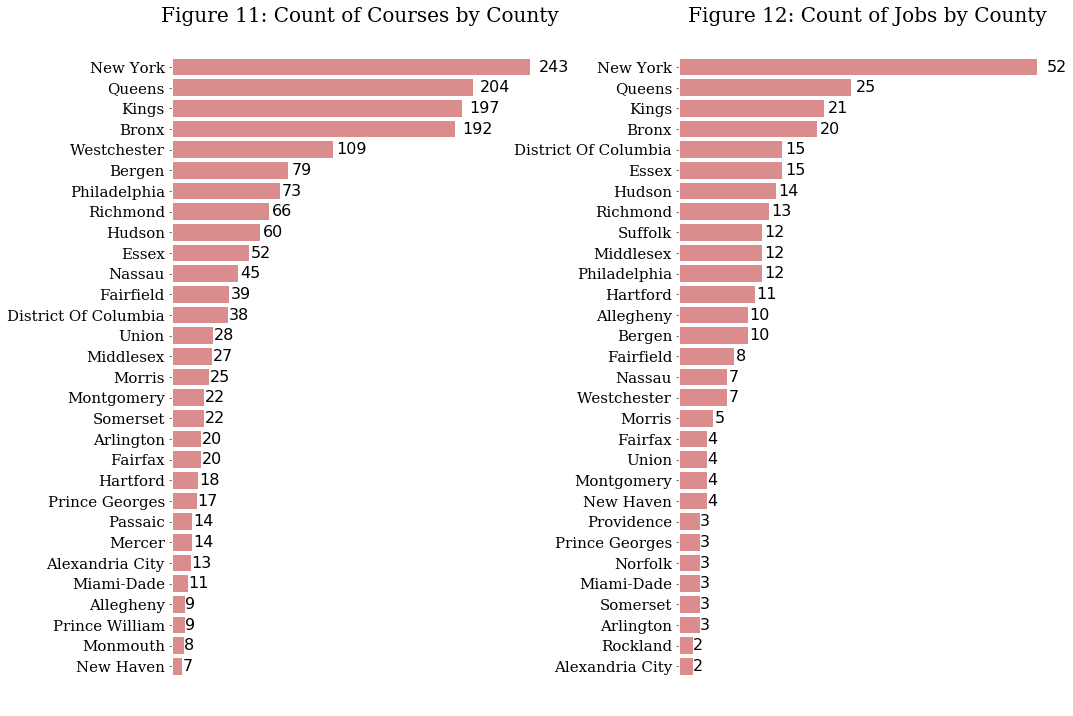

In [535]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1,2, figsize=(13,10))
plt.tight_layout(w_pad=10)

pos = list(range(len(df_state_c['County_work'])))[::-1]

axes[0].barh(pos, df_state_c['Count'],alpha=.7,align="center",color='indianred')
axes[0].set_title('Figure 11: Count of Courses by County', x=.50,fontsize=20,family="serif")
for rect in axes[0].patches:
    width = rect.get_width()
    axes[0].text(1.025*rect.get_width(), rect.get_y()+.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center',size=16)
axes[0].grid(b=None)
# axes.yaxis.grid(False)
axes[0].set_facecolor('white')

axes[0].xaxis.set_ticks_position('none')
axes[0].set_yticks(pos)
axes[0].set_yticklabels(df_state_c['County_work'], size =15,family='serif', color='black')
# axes.set_xlabel('Count',family='serif',size=26)
axes[0].get_xaxis().set_ticks([])



pos = list(range(len(df_state_j['County_work'])))[::-1]

axes[1].barh(pos, df_state_j['Count'],alpha=.7,align="center",color='indianred')
axes[1].set_title('Figure 12: Count of Jobs by County', x=.50,fontsize=20,family="serif")
for rect in axes[1].patches:
    width = rect.get_width()
    axes[1].text(1.025*rect.get_width(), rect.get_y()+.5*rect.get_height(),
                 '%d' % int(width),
                 ha='left', va='center',size=16)
axes[1].grid(b=None)
# axes.yaxis.grid(False)
axes[1].set_facecolor('white')

axes[1].xaxis.set_ticks_position('none')
axes[1].set_yticks(pos)
axes[1].set_yticklabels(df_state_j['County_work'], size =15,family='serif', color='black')
# axes.set_xlabel('Count',family='serif',size=26)
axes[1].get_xaxis().set_ticks([])


plt.show()


### SUMMARY

The explanatory data analysis indicates that most popular courses offered by 32bj Benefit Funds are Tabe Verbal, Tabe Math, Security Officer (8-hour annual), English as a Second Language I, Online: Introduction to Online Courses, Computer: Basics/New Users, CPR/AED, Electricity Basics, Plumbing Basics, and English as a Second Language II (for review, see Figure1). The least popular courses are Online: Lead Awareness in Construction, HVAC: Basic Troubleshooting, Harassment a& Diversity: Respecting Differences, Online: 30 hour General Industry Outreach, Online: Fan Safety, Online: How to Read an MSDS, and so on (please refer to Figure 2 to see 20 least popular courses). Most common job titles in the sample are cleaners, handy person, superintendents, custodians, security officers I, security guards (see Figure3 ). Other (100%), handy person, other (75%), superintendents, security officers I, other (85%), cleaners, resident managers, and custodians are more likely to take courses (see Figure 4). 

Most workers have spent from 0 to 5 years working for the Building Services while the maximum numbers of years working at the Building Services is 44 years (see Figure 5). Employees who have been working for Building Services on average for 26 to 31 years were more likely to take courses such as Bus Drivers and Attendants: Improving Communication with Students with Disabilities, Bus Drivers and Attendants: Engaging Students with Disabilities, and Bus Drivers and Attendants: Bullying Prevention and De-escalation, while employees who have been working for Building Services on average for 10 to 16 years were more likely to take courses such as Financial Literacy, Bus Drivers and Attendants: Sign Language Basics, Green Buildings: GPRO Fundamentals, Anger Management, Writing Skills for the Workplace, Online: 30 Hour General Industry Outreach,  and Security Officer: Conflict Management/Dispute  Resolution (see Figure 6). 

The data analysis has also explored the number of courses and job titles by state, city, and county. As Figure 7 and Figure 8 indicate, most job and most courses taken are located in NY state. That is, 32bj Benefit Funds is mostly serves NY state area followed by NJ, PA, CT, DC, and MA, respectively (see Figure 9 and Figure 10). Most of the employees and courses are located in NY City, followed by Brooklyn, Jamaica, and Bronx. Finally, the counties where most employees work and take courses are New York, Queens, Kings, and Bronx (for detailed review, see Figure 11 and Figure 12).  


### PART 2: RECOMMENDATION ENGINE 

There are basically two types of recommender systems, Content based and Collaborative filtering. Both have their pros and cons depending upon the context in which you want to use them.

In content-based recommender systems, keywords or properties of the items are taken into consideration while recommending an item to a user. So, basically, it is like recommending similar items. For example, the recommendation engine below recommends courses based on the content of the course that has been taken previously. If a member of 32bj Benefit Funds has taken course called Career Track: Superintendent/Resident Manager II in the past, it makes sense to recommend the same member the following courses: Career Track: Superintendent/Resident Manager I; Superintendent: How to Become One; Career Track: NYC Superintendent, Career Track: Handyperson;  or Career Track: Cleaner. In order to build this engine, I used TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator. The text in this case is the name of the course. I used cosine similarities to calculate a numeric quantity that denotes the similarity between two courses. Similarity is the cosine of the angle between the 2 vectors of the item vectors of A and B. Closer the vectors, smaller will be the angle and larger the cosine. You can see the cosine similarity scores in the brackets. The score ranges from 0 to 1 with 0 - indicating no similarities and 1 - indicating a complete match. The alternative ways would be using Pearson correlation and Euclidian distance but in this case, we have a tricky data that does not contain rating for each course so using cosine similarity is a good solution. In addition, it would be nice to have detailed course descriptions as they can significantly improve the accuracy of this engine. 

There several advantages and disadvantage using this type of content-based recommendation engine. Advantages are: 1) it does not require data from other users, 2) it can provide recommendations to users with unique tastes, 3) it can recommend new and unpopular items, 4) it can provide explanations of recommended items by listing content-features that caused an item to be suggested. Disadvantages are: 1) finding suitable features difficult (in this case having detailed description of courses would help to improve the accuracy), 2) recommendation for new users is difficult because it's not possible to build a user profile, 3) it never recommends items outside the user’s content profile and does not take the uniqueness of the user in consideration. 

The Collaborative Filtering Recommender is entirely based on the past behavior and not on the context. More specifically, it is based on the similarity in preferences, tastes and choices of two users. It analyses how similar the tastes of one user is to another and makes recommendations on the basis of that.

For instance, if user A likes movies 1, 2, 3 and user B likes movies 2,3,4, then they have similar interests and A should like movie 4 and B should like movie. Unfortunately, the current data set comes with many complications and building this type of engine would take time (approximately, from two weeks to 1 month). First there is no user rating for each course that complicates the problem. We do not know whether the worker liked the course or it was useful or him, we only know that the worker took the course. Second, we have over 200 courses and it would be hard to use a classifier for this type of problem so K-means or other types of clustering would be a good solution. The idea is to cluster the individuals by zip codes, working years, and job titles into several clusters and recommend courses that are taken by someone who belongs to the same cluster. However, there are additional complications with the data. Zip codes and job titles are categorical data while years working is continuous data. Clustering algorithms like K-means is only processing continuous data while clustering algorithms like K-modes only clustering categorical data. One idea is to convert categorical data into binary data and process it using K-means algorithm. Another approach is to build a manual K-prototype algorithm that combines K-means and K-modes algorithms. Both approaches require some time to implement and it cannot be done in three days.

This engine also comes with its advantages and disadvantages. Advantage includes a possibility of using the algorithm for any domain and in addition to domains, and disadvantage is that this type of engine suffers from the "new item" problem - until an item has had some interaction with users, there is a lack of data to properly classify and recommend it.

Ideally, it would useful to build both engine and combine their results into one recommendation engine. Basically, the ideal engine would a hybrid between collaborative filtering and content-based engine. 

### CONTENT-BASED RECOMMENDATION ENGINE 

In [262]:
data=pd.read_csv('data.csv',index_col = False)
df=data[['Course']].drop_duplicates()
df.reset_index(inplace=True)
df1=df[['Course']]
df2=df1.reset_index()

In [272]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

df=df2[['index','Course']]

tf = TfidfVectorizer(analyzer='word', min_df=0,ngram_range=(1, 3), stop_words='english')
tfidf_matrix = tf.fit_transform(df['Course'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

results = {}

for idx, row in df.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-10:-1]
    similar_items = [(cosine_similarities[idx][i], df['index'][i]) for i in similar_indices]
    results[row['index']] = similar_items[1:]
    
def item(id):
    return df.loc[df['index'] == id]['Course'].tolist()[0].split(' - ')[0]

def recommend(item_id, num):
    print("Recommending " + str(num) + " courses similar to " + item(item_id) + ":")
    print("-------")
    recs = results[item_id][:num]
    for rec in recs:
                print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")

recommend(item_id=55, num=5)

Recommending 5 courses similar to Career Track: Superintendent/Resident Manager II:
-------
Recommended: Career Track: Superintendent/Resident Manager I (score:0.885485779324)
Recommended: SUPERINTENDENT: HOW TO BECOME ONE (score:0.247788827521)
Recommended: Career Track: NYC Superintendent (score:0.236871165009)
Recommended: Career Track: Handyperson (score:0.204504769657)
Recommended: Career Track: Cleaner (score:0.204504769657)
